<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-14-nlp-regex/Natural_Language_Processing_Introduction_To_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


Import NLTK and spacy and download the features you'll need (as you go along if necessary).


In [ ]:
import nltk
nltk.download('popular')

Retrieve the text of a press article of your choice from the internet (in English it will be simpler, but you can take the language of your choice). Assign it to a variable via copy/paste.

In [ ]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://us.cnn.com/2020/12/14/health/us-coronavirus-monday/index.html')
soup = BeautifulSoup(res.content, 'html.parser')
# soup.find_all('div', class_='zn-body__paragraph')
article_text = "".join([p.text for p in soup.find_all('div', class_='zn-body__paragraph')])

Transform your text into sentence tokens, then into word tokens.

In [ ]:
sentences = nltk.sent_tokenize(article_text)
sentences[0]

'Thousands of vials of the vaccine were collected for distribution across the country Sunday after it passed its last regulatory hurdle.'

In [ ]:
tokens = [nltk.word_tokenize(word) for word in sentences]
tokens[0][0:3]

['Thousands', 'of', 'vials']

In [ ]:
import functools
import operator

counts_with_punc = functools.reduce(operator.iconcat, tokens, [])
counts_with_punc = nltk.FreqDist(counts_with_punc)
# counts_with_punc

Count how often each word appears and make a graph (if possible a bar chart) that represents the 20 most common words in your text.


<BarContainer object of 20 artists>

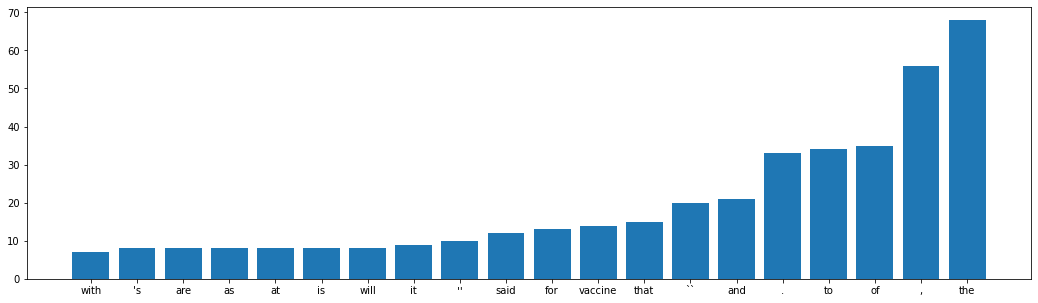

In [ ]:
counts_sorted = sorted(zip(counts_with_punc.values(), counts_with_punc.keys()))
top_20 = counts_sorted[-20:]
count = [c[0] for c in top_20]
word = [c[1] for c in top_20]
plt.figure(figsize=(18,5))
plt.bar(word, count)

Remove the stopwords and the punctuation, and look again at which words are the most present. Again, make the same graph for comparison.


<BarContainer object of 20 artists>

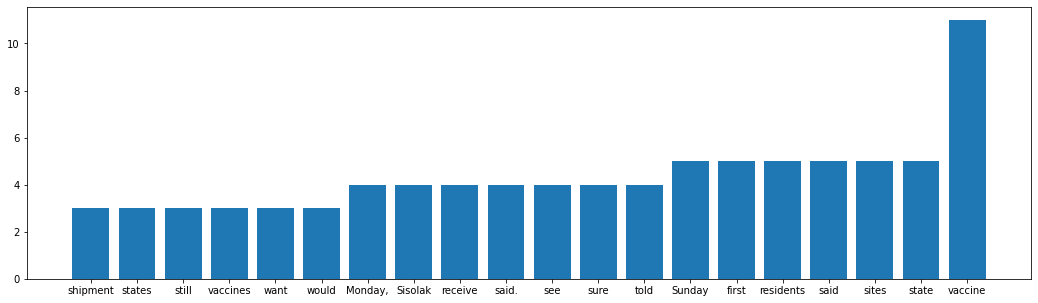

In [ ]:
list_sentence = []

for word in article_text.lower().split(" "):
  if word in nltk.corpus.stopwords.words("english"):
    pass
  else:
    list_sentence.append(word)

counts_with_punc_stop = nltk.FreqDist(list_sentence)

counts_sorted_stop = sorted(zip(counts_with_punc_stop.values(), counts_with_punc_stop.keys()))
top_20 = counts_sorted_stop[-20:]
count = [c[0] for c in top_20]
word = [c[1] for c in top_20]
plt.figure(figsize=(18,5))
plt.bar(word, count)

Use a stemmer and/or a lemmatizer to make the corpus of words even more relevant, and make a final graph.


<BarContainer object of 20 artists>

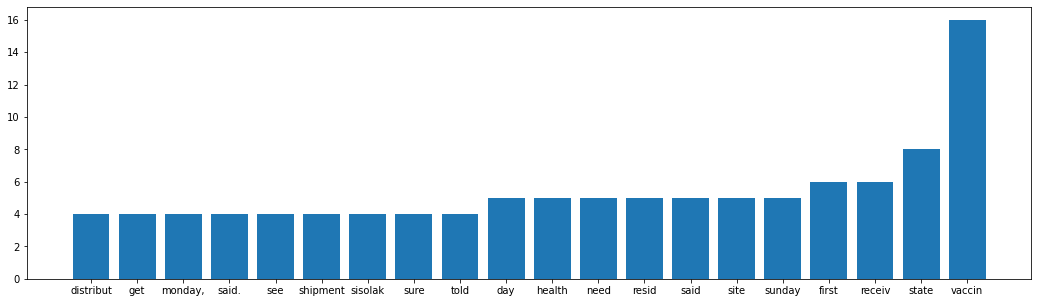

In [ ]:
from nltk.stem import SnowballStemmer
stem_en = SnowballStemmer("english")

stemmed = []

for word in list_sentence:
  stemmed.append(stem_en.stem(word))

counts_with_punc_stop = nltk.FreqDist(stemmed)

counts_sorted_stop = sorted(zip(counts_with_punc_stop.values(), counts_with_punc_stop.keys()))
top_20 = counts_sorted_stop[-20:]
count = [c[0] for c in top_20]
word = [c[1] for c in top_20]
plt.figure(figsize=(18,5))
plt.bar(word, count)

Select the most relevant preprocessing and make a wordcloud highlighting the most used words in your text. Stopwords and punctuation should not appear because you have cleaned them up.

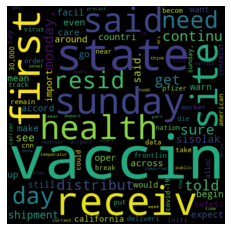

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=300, min_font_size=10)

wordcloud.generate_from_frequencies(counts_with_punc_stop)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()